In [1]:
from transformers import pipeline

In [5]:
pipeline("translation_en_to_de", model="<---?>")

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

2023-04-01 20:04:20.249774: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-01 20:04:20.249908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

KeyboardInterrupt: 

## Machine translation


In [6]:
from datasets import load_dataset

In [7]:
raw_data =  load_dataset("kde4", lang1="en", lang2="fr")

Found cached dataset kde4 (/Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac)


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
raw_data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [9]:
small = raw_data["train"].shuffle(seed=42).select(range(1000))

Loading cached shuffled indices for dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac/cache-71dca23ed0a2dee3.arrow


In [10]:
split = small.train_test_split(seed=42)

Loading cached split indices for dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac/cache-7bcb4e78b95a31f5.arrow and /Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac/cache-a365e05d934a9e32.arrow


In [11]:
split, split["train"][0]

(DatasetDict({
     train: Dataset({
         features: ['id', 'translation'],
         num_rows: 750
     })
     test: Dataset({
         features: ['id', 'translation'],
         num_rows: 250
     })
 }),
 {'id': '169005',
  'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}})

In [12]:
# !pip install sentencepiece
# !pip install sacremoses

In [13]:
from transformers import AutoTokenizer

checkpoint = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [14]:
en_sample = split["train"][5]["translation"]["en"]
fr_sample = split["train"][5]["translation"]["fr"]

In [15]:
en_ids = tokenizer(en_sample)

en_sample, tokenizer.convert_ids_to_tokens(en_ids["input_ids"])

('You can either pick a file or enter its name in the Location: box.',
 ['▁You',
  '▁can',
  '▁either',
  '▁pick',
  '▁a',
  '▁file',
  '▁or',
  '▁enter',
  '▁its',
  '▁name',
  '▁in',
  '▁the',
  '▁Location',
  ':',
  '▁box',
  '.',
  '</s>'])

(array([469., 131.,  40.,  28.,  10.,  15.,  15.,   5.,   5.,   4.,   0.,
          6.,   4.,   3.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.67200e+01, 5.24400e+01, 7.81600e+01, 1.03880e+02,
        1.29600e+02, 1.55320e+02, 1.81040e+02, 2.06760e+02, 2.32480e+02,
        2.58200e+02, 2.83920e+02, 3.09640e+02, 3.35360e+02, 3.61080e+02,
        3.86800e+02, 4.12520e+02, 4.38240e+02, 4.63960e+02, 4.89680e+02,
        5.15400e+02, 5.41120e+02, 5.66840e+02, 5.92560e+02, 6.18280e+02,
        6.44000e+02, 6.69720e+02, 6.95440e+02, 7.21160e+02, 7.46880e+02,
        7.72600e+02, 7.98320e+02, 8.24040e+02, 8.49760e+02, 8.75480e+02,
        9.01200e+02, 9.26920e+02, 9.52640e+02, 9.78360e+02, 1.00408e+03,
        1.02980e+03, 1.05552e+03, 1.08124e+03, 1.10696e+03, 1.13268e+03,
 

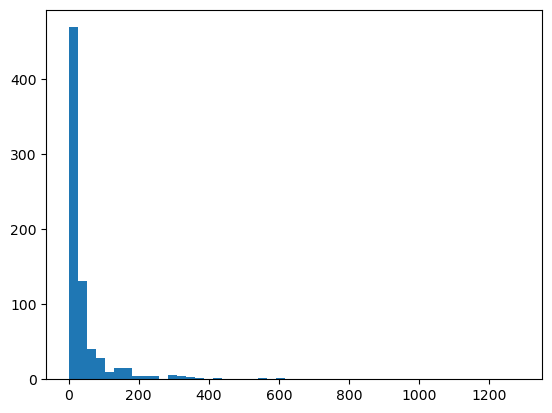

In [43]:
import matplotlib.pyplot as plt

train = split["train"]["translation"]
input_len = [len(tr["en"]) for tr in train]


plt.hist(input_len, bins=50)

In [78]:
print(tokenizer(fr_sample))
with tokenizer.as_target_tokenizer():
    fr_ids = tokenizer(fr_sample)
    print(fr_ids)
    print(fr_sample)
    print(tokenizer.convert_ids_to_tokens(fr_ids["input_ids"]))

{'input_ids': [461, 2130, 5909, 6020, 590, 239, 567, 9071, 900, 1248, 34, 5094, 3534, 108, 239, 567, 62, 1794, 1248, 113, 170, 122, 31, 8, 1283, 5, 1863, 51, 9831, 35646, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.
['▁Vous', '▁pouvez', '▁soit', '▁choisir', '▁un', '▁fichier', '▁soit', '▁saisir', '▁son', '▁nom', '▁dans', '▁la', '▁zone', '▁de', '▁texte', '▁Emplacement', '.', '</s>']


In [88]:
# Bad example 
_fr_ids = tokenizer(fr_sample)
print(_fr_ids)
print(fr_sample)
print(tokenizer.convert_ids_to_tokens(_fr_ids["input_ids"]))

{'input_ids': [461, 2130, 5909, 6020, 590, 239, 567, 9071, 900, 1248, 34, 5094, 3534, 108, 239, 567, 62, 1794, 1248, 113, 170, 122, 31, 8, 1283, 5, 1863, 51, 9831, 35646, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.
['▁V', 'ous', '▁po', 'uv', 'ez', '▁so', 'it', '▁cho', 'is', 'ir', '▁un', '▁fi', 'chi', 'er', '▁so', 'it', '▁s', 'ais', 'ir', '▁son', '▁no', 'm', '▁dans', '▁la', '▁zone', '▁de', '▁text', 'e', '▁Em', 'placement', '.', '</s>']


In [130]:
max_input_len = 128
max_target_len = 128

def tokenizer_fn(batch):
    inputs = [x['en'] for x in batch['translation']]
    targets = [x['fr'] for x in batch['translation']]

    tokenized_inputs = tokenizer(
        inputs, max_length=max_input_len, truncation=True)
    
    with tokenizer.as_target_tokenizer():
        tokenized_targets = tokenizer(
            targets, max_length=max_target_len, truncation=True)
  
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    return tokenized_inputs

In [131]:
tokenized_datasets = split.map(
    tokenizer_fn,
    batched=True,
    remove_columns=split['train'].column_names,
)

Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac/cache-a405013393c7ab70.arrow
Loading cached processed dataset at /Users/sanjeevhalyal/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac/cache-c4f2d80499f18947.arrow


In [132]:
tokenizer_dataset["train"][:3]

{'input_ids': [[402, 34933, 29244, 0],
  [526, 3261, 0],
  [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0]],
 'attention_mask': [[1, 1, 1, 1],
  [1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'labels': [[402, 9950, 108, 2240, 14, 6, 38367, 13218, 0],
  [526, 3261, 0],
  [34023,
   5,
   3948,
   5,
   372,
   402,
   38492,
   350,
   823,
   95,
   13439,
   2,
   25985,
   14,
   6,
   3996,
   3,
   0]]}

In [133]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

loading configuration file https://huggingface.co/Helsinki-NLP/opus-mt-en-fr/resolve/main/config.json from cache at /Users/sanjeevhalyal/.cache/huggingface/transformers/5ad88432037ab18b1eb95761258d2b1b3a32e1e401d5f610f86eb3f479e59e8c.c4ed4c40cbcad4e407fe9d49751d86cfbd347e4cb4edd0cdd23f501d9c3d088c
Model config MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-fr",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      59513
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 59513,
  "decoder_vocab_size": 59514,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encode

In [134]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [135]:
split["train"][5]

{'id': '46472',
 'translation': {'en': 'You can either pick a file or enter its name in the Location: box.',
  'fr': 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.'}}

In [136]:
tokenizer_dataset["train"][:3]

{'input_ids': [[402, 34933, 29244, 0],
  [526, 3261, 0],
  [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0]],
 'attention_mask': [[1, 1, 1, 1],
  [1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'labels': [[402, 9950, 108, 2240, 14, 6, 38367, 13218, 0],
  [526, 3261, 0],
  [34023,
   5,
   3948,
   5,
   372,
   402,
   38492,
   350,
   823,
   95,
   13439,
   2,
   25985,
   14,
   6,
   3996,
   3,
   0]]}

In [137]:
batch = data_collator([tokenized_datasets["train"][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [139]:
batch["input_ids"]

tensor([[  526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513],
        [ 3492,    14,  1360,     9, 21303,   259,    37,    47,   483,    61,
            32,   317,  2203,  4824,   514,   357,   352,  5482,   971,     4,
            39, 29830,     3,     0]])

In [142]:
# the first token is a pad!
tokenizer.convert_ids_to_tokens(batch["input_ids"][0])

['▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [141]:
# the first token is a pad!
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])

['<pad>',
 '▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']